# Artigo 2
* Aluno: Paulo Henrique Costa Gontijo
* Matrícula: 15/0143800
* Lição: *Deployment*
* Notebook: *From Model to Production*

| Hitórico de versão | Data |
|:--------------------:|:------:|
| v1 | 16/11/2022 |

## Propósito
Este artigo tem a intenção de documentar o passo a passo da segunda lição do curso, mostrando os blocos de códigos, o resultado das execuções, eventuais problemas encontrados e, se houverem, as possíveis soluções para os problemas.

## Tema
A lição 2 do curso FastAi tem o objetivo de, além de treinar e validar um modelo, colocá-lo em produção. Também será abordada outra forma de interagir com API's de imagens - neste caso a API do *Cognitive Search Azure*.

## Instalação das Bibliotecas

In [1]:
!pip install fastbook fastai nbdev graphviz azure azure-search-documents azure-cognitiveservices-vision-computervision azure-cognitiveservices-search-websearch azure-cognitiveservices-search-imagesearch

     |████████████████████████████████| 719 kB 1.1 MB/s            
     |████████████████████████████████| 240 kB 4.7 MB/s            
     |████████████████████████████████| 64 kB 4.8 MB/s            
     |████████████████████████████████| 47 kB 5.3 MB/s            
  Preparing metadata (setup.py) ... error
  ERROR: Command errored out with exit status 1:
   command: /home/gobellek/Documents/UnB/mlops/venv/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-8me_flmo/azure_d4d97385c04c42c4b1a423d3c09d27cf/setup.py'"'"'; __file__='"'"'/tmp/pip-install-8me_flmo/azure_d4d97385c04c42c4b1a423d3c09d27cf/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-1f2hvizk
       cwd: /tmp/pip-install

## Importação das Bibliotecas

In [2]:
from fastbook import *
from fastai import *
from fastai.vision.widgets import *
from fastai.vision.all import *
from fastbook import search_images_bing

> Ao executar esta célula, no formato original fornecido pelo repositório,
> encontrei o seguinte erro: 
> 
>```shell
>----> 4 from fastbook.utils import search_images_bing
> 
> ModuleNotFoundError: No module named 'fastbook.utils'
> ```
> 
> O erro foi corrigido omitindo o 'utils' do import, já que a função se 
> encontra no arquivo principal de importação.




## Interagindo com a API do Azure
Para fazer o download de imagens utilizando o *Azure Cognitive Search*, deve-se criar uma conta na plataforma Azure e instanciar o recurso. Feito isso, deve-se obter uma chave de acesso, a qual será utilizada pelo nosso bloco de código, cumprindo a função de autenticação com a nuvem.



### Injetando variáveis de ambiente
A função abaixo foi criada no âmbito de boas práticas de DevSecOps, ou seja, ela tem a intenção de mitigar vulnerabilidades de código, como por exemplo: a exposição de credenciais. Desta forma, não é necessário expor publicamente a chave de autenticação obtida no passo anterior.

Sua lógica de funcionamento é simples:
1. Deve-se criar um arquivo no mesmo diretório do jupyter notebook -> aconselho usar esta nomenclatura '.env', apesar de não ser obrigatório.
2. Adicione no arquivo criado, no passo anterior, os seguintes pares de chave e valor que você deseja adicionar no ambiente.
3. Execute a função usando como parâmetro o caminho do arquivo de variáveis.

In [3]:
import os
import logging

def inject_env_variable(dir):
    env_vars = os.popen(f'cat {dir}')
    for var in env_vars:
        key, value = var.split('=', 1)
        os.environ[key.rstrip()] = value.rstrip()
    logging.info(f"Done injecting variables from {dir}")
    print(f"Done injecting variables from {dir}")

* Executa função

In [7]:
inject_env_variable('.env')

Done injecting variables from env.txt


* Carrega as variáveis de ambiente

In [8]:
azr_key = 'AZURE_SEARCH_KEY'
key = os.environ.get(azr_key)

* Executa a requisição

In [9]:
results = search_images_bing(key, 'cachorro')
ims = results.attrgot('contentUrl')
len(ims)

150

* Declara tipos de imagens para buscar

In [10]:
dog_types = 'Pastor-Alemão','Pastor-Belga','Pastor-Belga-Tervueren'
path = Path('cachorros')

### Download dos blocos de imagens

In [11]:
from tqdm import tqdm
if not path.exists():
    path.mkdir()
    for o in tqdm(dog_types):
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} cachorro')
        download_images(dest, urls=results.attrgot('contentUrl'))

100%|██████████| 3/3 [00:47<00:00, 15.83s/it]


### Verificação de integridade das imagens

In [12]:
fns = get_image_files(path)
fns

(#437) [Path('cachorros/Pastor-Belga-Tervueren/1fadfa90-af07-4199-9b03-bb5069fd6bfd.jpg'),Path('cachorros/Pastor-Belga-Tervueren/c0cb9d65-6bd3-491c-b0c5-4a8e28666650.jpg'),Path('cachorros/Pastor-Belga-Tervueren/80d24edf-f84b-4f3d-821d-b98c969ac124.jpg'),Path('cachorros/Pastor-Belga-Tervueren/53a4bc75-440e-41ae-a726-3242b2988e38.jpg'),Path('cachorros/Pastor-Belga-Tervueren/5af6b6a1-0ccd-4db8-97cf-89b2a9f0a4c3.jpg'),Path('cachorros/Pastor-Belga-Tervueren/66ae5123-7d63-432e-96d4-8eee2a6edfcb.jpg'),Path('cachorros/Pastor-Belga-Tervueren/14bb395b-6924-4006-96a0-51e475620739.jpg'),Path('cachorros/Pastor-Belga-Tervueren/8c8d81dd-8d78-4597-b064-80f3defe3d50.jpg'),Path('cachorros/Pastor-Belga-Tervueren/0d146034-9a6c-465b-9a22-7564dd55581e.jpg'),Path('cachorros/Pastor-Belga-Tervueren/a100547c-de83-4247-b7bc-c8ad76501bfe.jpg')...]

### Exclusão de imagens corrompidas

In [13]:
failed = verify_images(fns)
failed

(#1) [Path('cachorros/Pastor-Alemão/dac40051-7fd1-4c4a-82e3-bf873c1cc98d.jpg')]

In [14]:
failed.map(Path.unlink);

## Criando um DataBlock
Como mencionado no último artigo, precisa-se criar um DataBlock para interagir com o módulo Dataloaders - responsável pela interação do modelo com os dados.



In [15]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.30, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = dogs.dataloaders(path)

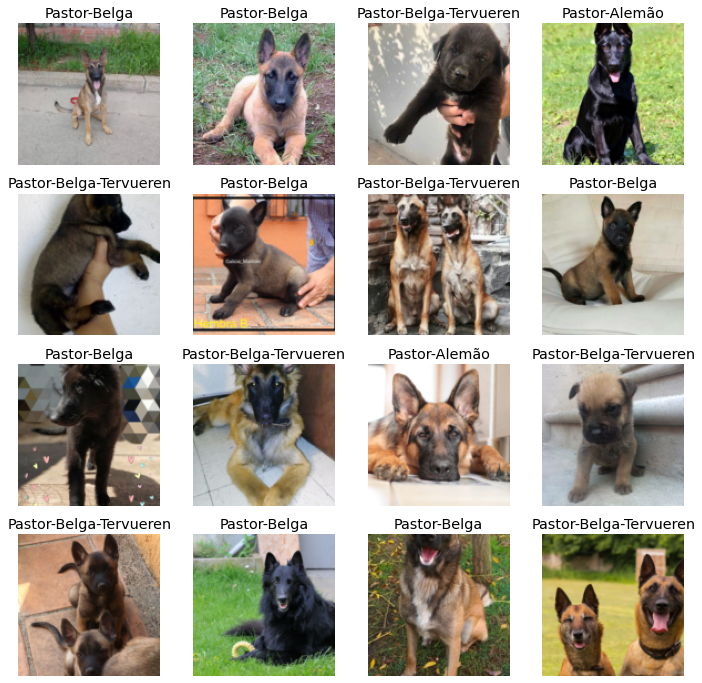

In [17]:
dls.valid.show_batch(max_n=16, nrows=4)

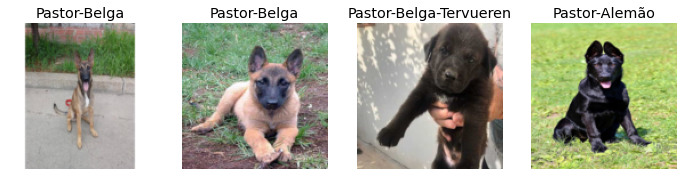

In [18]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

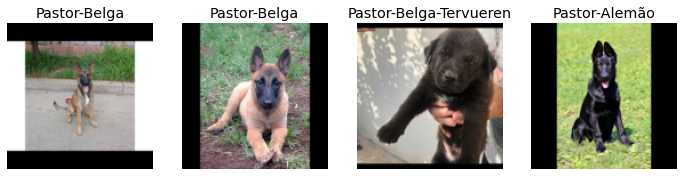

In [19]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

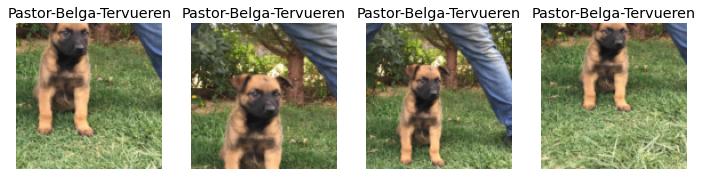

In [20]:
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation
Trata-se de uma técnica utilizada para criar diferentes variações dos dados introduzidos no treinamento do modelo. Utiliza-se do mesmo input para criar diferentes outros, como imagens deslocadas, rotacionadas, com diferentes perspectivas, brilho, intensidade de cor dentre outros.

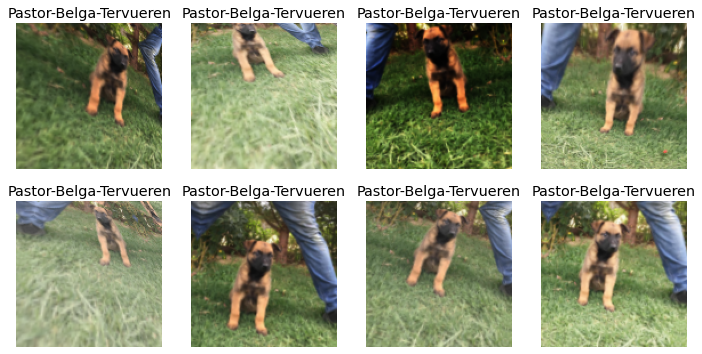

In [21]:
dogs = dogs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Treinando o modelo
Ao executar o treinamento do modelo utilizando o formato abaixo, obtive alguns erros:

1.
```shell
/Unb/mlops/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
```
2.
```shell
/Unb/mlops/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
```
3.
```shell
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788:
UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
warnings.warn(str(msg))
```

* Para solucionar o erro 3, encontrei esta função abaixo em uma discussão no github encontrado neste link: 
> https://github.com/horovod/horovod/issues/333

In [22]:
from PIL import Image

file_names = get_image_files(path)

def remove_exif(image_name):
    image = Image.open(image_name)
    if not image.getexif():
        return
    print('removing EXIF from', image_name, '...')
    data = list(image.getdata())
    image_without_exif = Image.new(image.mode, image.size)
    image_without_exif.putdata(data)

    image_without_exif.save(image_name)

for file in file_names:
    remove_exif(file)
print('done')

removing EXIF from cachorros/Pastor-Belga-Tervueren/c0cb9d65-6bd3-491c-b0c5-4a8e28666650.jpg ...
removing EXIF from cachorros/Pastor-Belga-Tervueren/53a4bc75-440e-41ae-a726-3242b2988e38.jpg ...
removing EXIF from cachorros/Pastor-Belga-Tervueren/82c21730-bb87-44ec-a1a2-612c6bd01900.jpg ...
removing EXIF from cachorros/Pastor-Belga-Tervueren/76bb8c92-088e-4738-b152-1cf69f1baf10.jpg ...
removing EXIF from cachorros/Pastor-Belga-Tervueren/67de2877-c9ae-4396-95d4-4b65c189ece4.jpg ...
removing EXIF from cachorros/Pastor-Belga-Tervueren/f520df1d-d909-430c-ae9f-0e1aedd6ec07.jpg ...
removing EXIF from cachorros/Pastor-Belga-Tervueren/8359c9d5-5a3c-46bd-8f49-17d9dca19d06.jpg ...
removing EXIF from cachorros/Pastor-Belga-Tervueren/21b797d2-ac6e-4ffb-ada8-ee22b671eed5.jpg ...
removing EXIF from cachorros/Pastor-Belga-Tervueren/16cf34d4-8ae4-417d-b16b-5bd7547b0691.jpg ...
removing EXIF from cachorros/Pastor-Belga-Tervueren/86a44aee-237e-45b9-8773-7f3c6fdacc96.jpg ...
removing EXIF from cachorros/P

In [23]:
dogs = dogs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)

In [24]:
learn = vision_learner(dls, resnet101, metrics=error_rate)
learn.fine_tune(10)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

> Na primeira execução do treinamento do modelo, usei o *resnet34*, porém percebi que mesmo aumentando o número de iterações do *fine_tuning* a eficácia não melhorava. Com base nisso, utilizei um artigo de referência, do proprio Jeremy Howard, onde ele demonstra um *benchmark* dos modelos pré-treinados e, diante disso, percebi que um modelo interessante seria o *levit384*.

> Ao tentar rodar o vision_learner com o *levit384*, obtive erros de compatibilidade com a biblioteca **Timm**, os quais não consegui resolver.

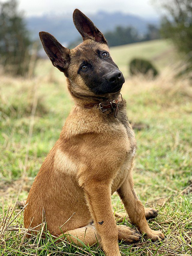

In [25]:
dest = 'pastor-belga'
results = search_images_bing(key, 'pastor-belga', max_images=1)
download_images(dest, urls=results.attrgot('contentUrl'))

img = ('pastor-belga', str(os.listdir('pastor-belga')[0]).rstrip())
img_path = '/'.join(img)
im = Image.open(img_path)
im.to_thumb(256,256)

This is a: Pastor-Belga.
Probability it's a pastor-alemão: 0.0013
Probability it's a pastor-belga: 0.9969
Probability it's a pastor-belga-tervueren: 0.0018


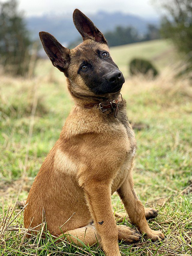

In [26]:
is_what,_,probs = learn.predict(PILImage.create(img_path))
print(f"This is a: {is_what}.")
print(f"Probability it's a pastor-alemão: {probs[0]:.4f}")
print(f"Probability it's a pastor-belga: {probs[1]:.4f}")
print(f"Probability it's a pastor-belga-tervueren: {probs[2]:.4f}")

im = Image.open(img_path)
im.to_thumb(256,256)

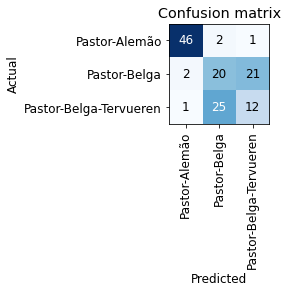

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

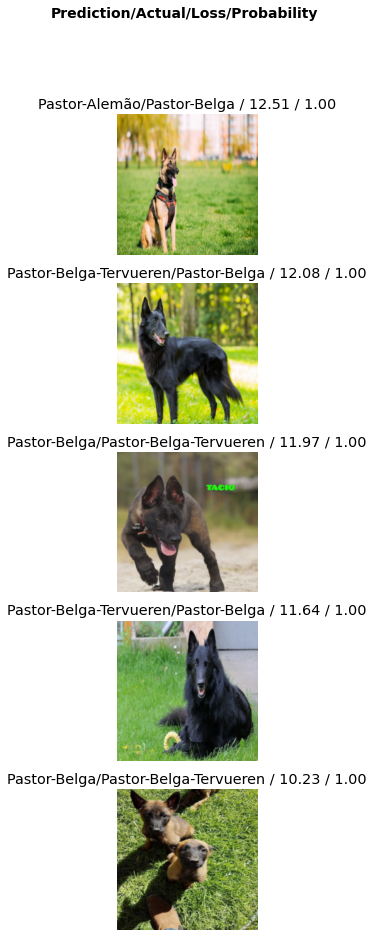

In [28]:
interp.plot_top_losses(5, nrows=5)

## Sanitização dos datasets
Utilizando a função abaixo é possível explorar os datasets, classificando-os de acordo com sua categoria e/ou excluindo o que não seja interessante.

In [29]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [30]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Re-treinamento do modelo
Após sanitização dos datasets.

In [31]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.30, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
dls = dogs.dataloaders(path)

In [32]:
learn = vision_learner(dls, resnet101, metrics=error_rate)
learn.fine_tune(10)

This is a: Pastor-Belga.
Probability it's a pastor-alemão: 0.0001
Probability it's a pastor-belga: 0.9992
Probability it's a pastor-belga-tervueren: 0.0007


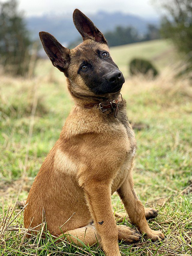

In [33]:
is_what,_,probs = learn.predict(PILImage.create(img_path))
print(f"This is a: {is_what}.")
print(f"Probability it's a pastor-alemão: {probs[0]:.4f}")
print(f"Probability it's a pastor-belga: {probs[1]:.4f}")
print(f"Probability it's a pastor-belga-tervueren: {probs[2]:.4f}")

im = Image.open(img_path)
im.to_thumb(256,256)

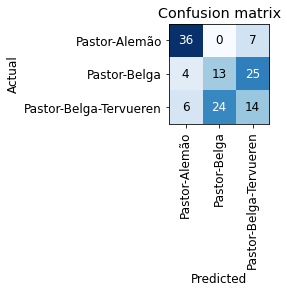

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Deploy do Modelo
Nesta etapa, gera-se um arquivo do tipo **pickle** o qual armazena o modelo treinado. Desta forma, é possível utilizar o arquivo para gerar predições sem ter de treinar o modelo novamente.

Existem alguma aplicações como o Gradio e HuggingFace, as quais trabalham em conjunto para fornecer um ambiente gratuito para realizar o deploy do modelo.

* Exportando modelo

In [35]:
learn.export()

In [36]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

* Testando modelo exportado

In [37]:
learn_inf = load_learner(path/'export.pkl')

In [51]:
print(learn_inf.dls.vocab)
learn_inf.predict(img_path)

['Pastor-Alemão', 'Pastor-Belga', 'Pastor-Belga-Tervueren']


('Pastor-Belga',
 TensorBase(1),
 TensorBase([1.2746e-04, 9.9920e-01, 6.7592e-04]))

## Acessando o modelo online
Como dito acima, neste artigo utilizou-se a plataforma HuggingFace para fazer o deploy da nosso aplicação. Você pode conferir e interagir com o app neste link abaixo:

> https://huggingface.co/spaces/paulohgontijoo/fastai-course

## Referências Bibliográficas

> https://www.microsoft.com/en-us/bing/apis/bing-web-search-api, acessado em 7/11/2022.

> https://learn.microsoft.com/en-us/azure/cognitive-services/, acessado em 07/11/2022.

> https://www.kaggle.com/code/jhoward/which-image-models-are-best, acessado em 08/11/2022